In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from PIL import Image
from imutils import paths
import numpy as np
import os
import random
import cv2
import mahotas as mt
import matplotlib.pyplot as plt
import itertools
from sklearn.tree import export_graphviz
import pickle

In [21]:
# Feature extract

def fd_hu_moments(image):
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

def fd_histogram(image, mask=None):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([image], [0,1,2], None, [bins, bins, bins], [0,256,0,256,0,256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [22]:
# Loading images
print("[INFO] loading images...")
common_rust_img = sorted(list(paths.list_images("data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_")))
healthy_img = sorted(list(paths.list_images("data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy")))
print("[INFO] done loading images!")
imagePaths = common_rust_img + healthy_img

random.seed(42)
random.shuffle(imagePaths)

data=[]
labels=[]
features=[]
IMAGE_DIMS=(50,50,1)
bins = 8

[INFO] loading images...
[INFO] done loading images!


In [23]:
# looping over 
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.resize(image,(IMAGE_DIMS[1],IMAGE_DIMS[0]))
    
    fv_histogram = fd_histogram(image)
    
    image= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    fv_hu_moments = fd_hu_moments(image)
    
    global_feature = np.hstack([fv_histogram,fv_hu_moments])
    data.append(global_feature)
    
    l = label = imagePath.split(os.path.sep)[-2]
    labels.append(l)
    

In [25]:
print(data[0])
print(labels[0])

[ 6.13642931e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.31120288e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.93360853e-03
  5.76929264e-02  9.44066048e-02  2.62240581e-02  1.31120288e-03
  2.62240577e-03  3.93360853e-03  2.62240577e-03  2.88464632e-02
  2.41261333e-01  1.66522771e-01  2.22904496e-02  0.00000000e+00
  2.62240577e-03  1.31120288e-03  2.62240577e-03  4.45808992e-02
  1.52099535e-01  3.80248837e-02  0.00000000e+00  0.00000000e+00
  6.55601453e-03  0.00000000e+00  1.31120288e-03  2.75352597e-02
  1.70456376e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.62240577e-03  1.31120288e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.85145077e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [6]:
# partition the data into training and testing splits
print("[INFO] constructing training/testing split...")
(trainData,testData,trainLabels,testLabels) = train_test_split(data,labels,test_size=0.25,random_state=42)

[INFO] constructing training/testing split...


In [7]:
# define the dictionary of models our script can use

models = {
    "knn": KNeighborsClassifier(n_neighbors=1),
    "naive_bayes": GaussianNB(),
    "logit": LogisticRegression(solver="lbfgs",multi_class="auto"),
    "svm": SVC(kernel="poly",degree=2),
    "random_forest": RandomForestClassifier(n_estimators=100),
}

In [8]:
# train the model
print("[INFO] using '{}' model".format("svm"))
model = models["svm"]
model.fit(trainData,trainLabels)


print("[INFO] using '{}' model".format("knn"))
modelKnn = models["knn"]
modelKnn.fit(trainData,trainLabels)

print("[INFO] using '{}' model".format("naive_bayes"))
modelGuassian = models["naive_bayes"]
modelGuassian.fit(trainData,trainLabels)


print("[INFO] using '{}' model".format("logit"))
modelLogistic = models["logit"]
modelLogistic.fit(trainData,trainLabels)

print("[INFO] using '{}' model".format("random_forest"))
modelRandomForest = models["random_forest"]
modelRandomForest.fit(trainData,trainLabels)


[INFO] using 'svm' model
[INFO] using 'knn' model
[INFO] using 'naive_bayes' model
[INFO] using 'logit' model
[INFO] using 'random_forest' model


RandomForestClassifier()

In [9]:
common_rust_img_test = sorted(list(paths.list_images("data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Common_rust_")))
healthy_img_test = sorted(list(paths.list_images("data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___healthy")))
imagePaths_test = common_rust_img_test + healthy_img_test



random.seed(42)
random.shuffle(imagePaths_test)
datatest=[]
labelstest=[]
IMAGE_DIMS=(50,50,1)
bins = 8

In [10]:
for imagePath in imagePaths_test:
    image = cv2.imread(imagePath)
    image = cv2.resize(image,(IMAGE_DIMS[1],IMAGE_DIMS[0]))
    
    fv_histogram = fd_histogram(image)
    
    image= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    fv_hu_moments = fd_hu_moments(image)
    
    global_feature = np.hstack([fv_histogram,fv_hu_moments])
    datatest.append(global_feature)
    
    l = label = imagePath.split(os.path.sep)[-2]
    labelstest.append(l)
    

In [16]:
print("[INFO] evaluating svm...")
predictionstest = model.predict(datatest)
print(classification_report(labelstest,predictionstest))

print("[INFO] evaluating knn...")
predictionstestKnn = modelKnn.predict(datatest)
print(classification_report(labelstest,predictionstestKnn))

print("[INFO] evaluating modelGuassian...")
predictionstestGuassion = modelGuassian.predict(datatest)
print(classification_report(labelstest,predictionstestGuassion))

print("[INFO] evaluating Logistic...")
predictiontestModelLogistic = modelLogistic.predict(datatest)
print(classification_report(labelstest,predictiontestModelLogistic))

print("[INFO] evaluating modelGuassian...")
predictionstestRandForest = modelRandomForest.predict(datatest)
print(classification_report(labelstest,predictionstestRandForest))

[INFO] evaluating svm...
                             precision    recall  f1-score   support

Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
     Corn_(maize)___healthy       1.00      1.00      1.00       465

                   accuracy                           1.00       942
                  macro avg       1.00      1.00      1.00       942
               weighted avg       1.00      1.00      1.00       942

[INFO] evaluating knn...
                             precision    recall  f1-score   support

Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
     Corn_(maize)___healthy       1.00      1.00      1.00       465

                   accuracy                           1.00       942
                  macro avg       1.00      1.00      1.00       942
               weighted avg       1.00      1.00      1.00       942

[INFO] evaluating modelGuassian...
                             precision    recall  f1-score   support

Corn_(maize

In [24]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=90)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max()/2.
    
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[477   0]
 [  0 465]]


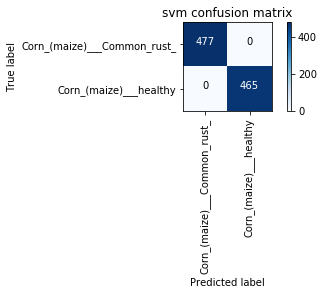

In [25]:
cnf_matrix = confusion_matrix(labelstest, predictionstest)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=lb.classes_,title="svm confusion matrix")
plt.show()

In [22]:
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))